In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Practice. 단일 입력 데이터 (1차원)

In [7]:
X = np.array([1, 2, 3])
y = np.array([1, 2, 3])

tf.random.set_seed(2021)

def cost_func(W, X, y):
    return tf.reduce_mean(tf.square(W*X-y))

cost = []
linspace = np.linspace(-3, 5, num=15)
for feed_W in linspace:
    current_cost = cost_func(feed_W, X, y)
    print('{:3f} : {:3f}'.format(feed_W, current_cost))
    cost.append(current_cost)

-3.000000 : 74.666667
-2.428571 : 54.857143
-1.857143 : 38.095238
-1.285714 : 24.380952
-0.714286 : 13.714286
-0.142857 : 6.095238
0.428571 : 1.523810
1.000000 : 0.000000
1.571429 : 1.523810
2.142857 : 6.095238
2.714286 : 13.714286
3.285714 : 24.380952
3.857143 : 38.095238
4.428571 : 54.857143
5.000000 : 74.666667


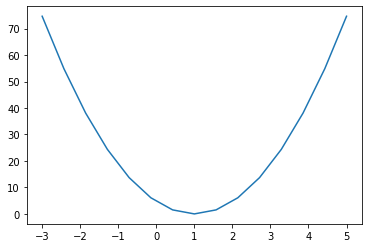

In [8]:
plt.plot(linspace, cost)

In [12]:
tf.random.set_seed(2021)

# 일반 list로 넣어줘도 정상 동작하기는 함.
# x_data = [1., 2., 3., 4.]
# y_data = [1., 3., 5., 7.]
x_data = np.array([1., 2., 3., 4.])
y_data = np.array([1., 3., 5., 7.])

W = tf.Variable(tf.random.normal((1,), -100, 100))

for step in range(300):
    hypothesis = W * x_data
    cost = tf.reduce_mean(tf.square(hypothesis - y_data))
    
    alpha = 0.01
    
    # Loss를 w에 대하여 미분한 값 = gradient
    gradient = tf.reduce_mean(tf.multiply(tf.multiply(W, x_data) - y_data, x_data))
    descent = W - tf.multiply(alpha, gradient)
    W.assign(descent) # weight update
    
    if step % 10 == 0:
        print(f"{step}|{cost.numpy()}|{W.numpy()}")

0|70.94114685058594|[4.508178]
10|15.050384521484375|[2.969734]
20|3.2966818809509277|[2.2642305]
30|0.8249022364616394|[1.940699]
40|0.30509233474731445|[1.7923331]
50|0.1957772821187973|[1.7242951]
60|0.1727885603904724|[1.693094]
70|0.16795407235622406|[1.6787858]
80|0.1669374257326126|[1.6722243]
90|0.1667235940694809|[1.6692153]
100|0.16667863726615906|[1.6678356]
110|0.16666918992996216|[1.6672028]
120|0.16666719317436218|[1.6669126]
130|0.16666677594184875|[1.6667794]
140|0.1666666865348816|[1.6667184]
150|0.1666666716337204|[1.6666903]
160|0.1666666716337204|[1.6666775]
170|0.1666666716337204|[1.6666716]
180|0.1666666716337204|[1.6666689]
190|0.1666666567325592|[1.6666677]
200|0.1666666567325592|[1.6666675]
210|0.1666666567325592|[1.6666675]
220|0.1666666567325592|[1.6666675]
230|0.1666666567325592|[1.6666675]
240|0.1666666567325592|[1.6666675]
250|0.1666666567325592|[1.6666675]
260|0.1666666567325592|[1.6666675]
270|0.1666666567325592|[1.6666675]
280|0.1666666567325592|[1.6666

# Practice. 복수 입력 데이터 (1차원)

In [15]:
X1 = [ 73.,  93.,  89.,  96.,  73.]
X2 = [ 80.,  88.,  91.,  98.,  66.]
X3 = [ 75.,  93.,  90., 100.,  70.]
Y  = [152., 185., 180., 196., 142.]

In [22]:
w1 = tf.Variable(10.)
w2 = tf.Variable(10.)
w3 = tf.Variable(10.)
b = tf.Variable(10.)

learning_rate = 0.00001
for i in range(1000):
    with tf.GradientTape() as tape:
        hypothesis = X1*w1 + X2*w2 + X3*w3 + b
        cost = tf.reduce_mean(tf.square(hypothesis - Y))
    
    wb = [w1, w2, w3, b]
    wb_grads = tape.gradient(cost, wb)
    [wb_.assign_sub(learning_rate * grad_) for (wb_, grad_) in zip(wb, wb_grads)]
    
    if i % 50 == 0:
        print(f"{i} : {cost.numpy()}")

0 : 5793889.5
50 : 1.9081224203109741
100 : 1.876638650894165
150 : 1.8459680080413818
200 : 1.8160779476165771
250 : 1.7869484424591064
300 : 1.7585582733154297
350 : 1.730913519859314
400 : 1.7039463520050049
450 : 1.677677869796753
500 : 1.6520942449569702
550 : 1.6271454095840454
600 : 1.6028306484222412
650 : 1.579122543334961
700 : 1.556044340133667
750 : 1.5335266590118408
800 : 1.511573076248169
850 : 1.4901779890060425
900 : 1.469331979751587
950 : 1.449010968208313


# Practice. 다차원 입력 데이터

In [35]:
data = np.array([
   # x1   x2   x3    y
    [73., 80., 75., 152.],
    [93., 88., 93., 185.],
    [89., 91., 90., 180.], 
    [96., 98., 100., 196.], 
    [73., 66., 70., 142.]
], dtype=np.float32)

In [36]:
X = data[:, :-1]
y = data[:, -1]

In [65]:
tf.random.set_seed(2021)
W = tf.Variable(tf.random.normal((3, 1)))
b = tf.Variable(tf.random.normal((1,)))
learning_rate = 0.000001

for i in range(10001):
    with tf.GradientTape() as tape:
        hypothesis = tf.matmul(X, W) + b
        cost = tf.reduce_mean(tf.square(hypothesis - Y))
        w_grad, b_grad = tape.gradient(cost, [W, b])
        
    W.assign_sub(learning_rate * w_grad)
    b.assign_sub(learning_rate * b_grad)
    
    if i % 1000 == 0:
        print(f"{i}|{cost.numpy():.2f}")

0|2653.60
1000|849.99
2000|848.36
3000|846.74
4000|845.13
5000|843.52
6000|841.93
7000|840.34
8000|838.76
9000|837.18
10000|835.62


In [72]:
import pandas as pd
pd.DataFrame({'pred':(tf.matmul(X, W) + b).numpy().flatten(),
             'target':y})

,pred,target
0,146.678604,152.0
1,183.761917,185.0
2,177.314804,180.0
3,192.494766,196.0
4,142.403183,142.0


# 동물원 데이터 실습
```
https://archive.ics.uci.edu/ml/machine-learning-databases/zoo/zoo.data
  1. animal name:     (deleted)
  2. hair     Boolean 
  3. feathers     Boolean 
  4. eggs     Boolean  
  5. milk     Boolean  
  6. airborne     Boolean  
  7. aquatic      Boolean  
  8. predator     Boolean  
  9. toothed      Boolean  
 10. backbone     Boolean  
 11. breathes     Boolean  
 12. venomous     Boolean  
 13. fins     Boolean  
 14. legs     Numeric (set of values: {0 ,2,4,5,6,8})
 15. tail     Boolean  
 16. domestic     Boolean  
 17. catsize      Boolean 
 18. type     Numeric (integer values in range [0 ,6])
```

In [210]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [211]:
data = np.loadtxt('./data/zoo.csv', delimiter=',', dtype=np.float32)
data

array([[1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 3.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 6.],
       [0., 1., 1., ..., 0., 0., 1.]], dtype=float32)

In [243]:
X = data[:, :-1]
y = data[:, -1]

class_count = len(pd.Series(y).unique())
y = tf.one_hot(y, class_count).numpy()
#y = pd.get_dummies(data[:, -1]).values

In [241]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2021,
                                                   test_size=0.2)
dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(len(X_train))

In [242]:
X.shape, y.shape

((101, 16), (101, 7))

In [216]:
def logistic_regression(features):
    hypothesis = tf.divide(1.,1.+tf.exp(tf.matmul(features, W)+b))
    return hypothesis

In [217]:
# Softmax
def loss_fn(hypothesis, labels):
#     cost = -tf.reduce_mean(labels * tf.math.log(hypothesis)
#                           +(1-labels)*tf.math.log(1-hypothesis))
    return tf.keras.losses.categorical_crossentropy(labels, hypothesis,
                                                   from_logits=True)

In [244]:
def accuracy_fn(hypothesis, labels, class_count):
    # cast = 형변환
    #predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
    #print(np.argmax(np.array(hypothesis), axis=1))
    
#     predicted = np.zeros(hypothesis.shape)
#     argmax = np.argmax(np.array(hypothesis), axis=1)
#     for i, am in enumerate(argmax):
#         predicted[i, am] += 1
    
    predicted = tf.one_hot(np.argmax(hypothesis, axis=1), class_count)    
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, labels), dtype=tf.float32))
    return accuracy

In [245]:
def grad(features, labels):
    with tf.GradientTape() as tape:
        #print(logistic_regression(features).shape)
        loss = loss_fn(logistic_regression(features), labels)
    return loss, tape.gradient(loss, [W, b])

In [247]:
# W = tf.Variable(tf.random.normal((len(X_train[0, :]),1)), name='weight')
W = tf.Variable(tf.random.normal((X.shape[1],y.shape[1])), name='weight')
b = tf.Variable(tf.random.normal((1,)), name='bias')
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)

for step in range(1001):
    for features, labels in iter(dataset):
        loss, grads = grad(features, labels)
        optimizer.apply_gradients(zip(grads, [W,b]))
        if step % 100 == 0:
            print(f"Iter: {step}. Mean Loss (categorical CE):{np.mean(loss)}")

test_acc = accuracy_fn(logistic_regression(X_test), y_test, class_count)
print(f"Test Accuracy : {test_acc:4f}")

Iter: 0. Mean Loss (categorical CE):2.021829128265381
Iter: 100. Mean Loss (categorical CE):1.6642338037490845
Iter: 200. Mean Loss (categorical CE):1.6036765575408936
Iter: 300. Mean Loss (categorical CE):1.583228349685669
Iter: 400. Mean Loss (categorical CE):1.5707824230194092
Iter: 500. Mean Loss (categorical CE):1.5612709522247314
Iter: 600. Mean Loss (categorical CE):1.5532066822052002
Iter: 700. Mean Loss (categorical CE):1.545939564704895
Iter: 800. Mean Loss (categorical CE):1.5391162633895874
Iter: 900. Mean Loss (categorical CE):1.5325305461883545
Iter: 1000. Mean Loss (categorical CE):1.5260757207870483
Test Accuracy : 0.836735
